Data Analysis – Advanced Statistics with Python  
Dr. Julia Jerke | HS 2021


# Exercise sheet 5 – November 26, 2021


**Please submit your solution electronically until November 26, 2021, 23:59  
Send your script-file to jerke@soziologie.uzh.ch**


**Notes:**  
- **Please sufficiently comment your script and structure it according to the different tasks.**
- **Whenever a task asks for an explicit answer, please write down your answer directly in the script within a comment.**
- **Make sure that you fully document your solution in your script. If you give an answer, but there is no code to clearly reconstruct how the answer was determined, the answer cannot be counted.**
- **The tasks vary in difficulty. For some of them you may have to combine commands in a new way or have to look in the documentation of the respective libraries.**
- **Most exercise sheets will contain bonus questions, providing the possibility to obtain extra points.**
- **The solution of this sheet will be published on OLAT after the submission deadline expires.**

---

**_Note on jupyter notebook: The empty cells are just placeholders - you may create as many cells as you need!_**

---

### 1. K-means clustering

For this exercise we will be again working with the happiness data set. Load it into python.
We want to identify clusters within the countries by looking at the happiness score and the generosity indicator

1. Standardize the two variables to ensure that they have equal influence on the clustering procedure.
2. Run the K-means clustering. The algorithm requires you to determine the number of clusters beforehand.
    1. Try out different numbers $k$ of clusters.
    2. Compare the different solutions with respect to the SSE. For which cluster solution do you decide?
3. Plot your cluster solution and make sure that the countries are colored according to the clusters they belong to.

In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries that are needed for the cluster analysis
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Loading the data set
happy = pd.read_csv("world_happiness_2019.csv")
happy.head()

,Unnamed: 0,rank,country,score,gdp,support,life,choices,generosity,corruption,continent,develop
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,0.0
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,0.0
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,0.0
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,0.0
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,0.0


#### 1 - Selecting and standardizing the variables

In [3]:
# Selecting the variables and the subset
var1 = "score"
var2 = "generosity"

happy_cluster = happy[[var1,var2]]

In [4]:
# Standardization of the variables: standard normal transformation
scaled_happy_cluster = StandardScaler().fit_transform(happy_cluster)

print(scaled_happy_cluster[:5])

[[ 2.12871112 -0.33540398]
 [ 1.97639663  0.70726491]
 [ 1.93493825  0.90737308]
 [ 1.8808621   1.78152982]
 [ 1.87545448  1.44450554]]


#### 2 - Running the cluster analysis

A. Trying different numbers of clusters

In [4]:
# First, we define an empty list that will later store the SSE from each iteration over the cluster numbers
sse = []

# Second, we can loop over the number of clusters k
for k in range(1, 11):  # we estimate cluster solutions for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=20) # instantiating the cluster model but with varying k
    kmeans.fit(scaled_happy_cluster) # estimating the cluster model
    sse.append(kmeans.inertia_) # adding the inertia value from the current round (the current k) to the list that is collecting the inertia value for all rounds

C:\Users\jjerke\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


B. Comparing the cluster solutions

Text(0, 0.5, 'SSE')

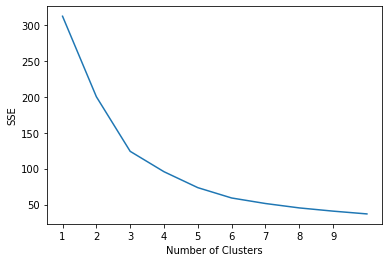

In [5]:
# Plotting the SSE for the different cluster solutions
fig, ax = plt.subplots()
ax.plot(range(1, 11), sse)
ax.set_xticks(range(1, 10))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")

In [6]:
from kneed import KneeLocator
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing").elbow
knee

3

The elbow plot as well the KneeLocater suggest the three-cluster solution.

In [7]:
# Repeating the cluster anaysis with 3 clusters
kmeans_s = KMeans(n_clusters=knee, init="random", n_init=20)
kmeans_s.fit(scaled_happy_cluster)

KMeans(init='random', n_clusters=3, n_init=20)

In [8]:
# Adding the cluster results to the data set
kmeans_scaled_label = kmeans_s.labels_
happy["kmeans_cluster_scaled"] = kmeans_scaled_label

#### 3 - Plotting the cluster result

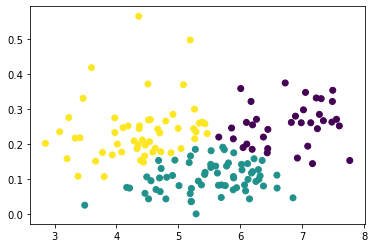

In [9]:
plt.scatter(var1,var2,data=happy,c="kmeans_cluster_scaled")

### 2. Agglomerative clustering

There are various clustering methods and they all have strengths and weaknesses. Further, different algorithms will usually result in different cluster solutions.

1. Repeat the cluster analysis from before, but this time with the agglomerative clustering algorithm. Use the same number of clusters that you have determined in the previous exercise. Make sure to use the standardized data.
2. Plot your cluster solution and color the countries according to the clusters they belong to.
3. Compare the plots from the K-means and the agglomerative clustering. Where do you see differences?

#### 1 - Agglomerative clustering with three clusters

In [10]:
# Agglomerative clustering with standardized data and three clusters
agglo = AgglomerativeClustering(n_clusters=knee)
cluster = agglo.fit(scaled_happy_cluster)
agglo_scaled_label = agglo.labels_
happy["agglo_cluster_scaled"] = agglo_scaled_label

#### 2 - Plotting the cluster solution

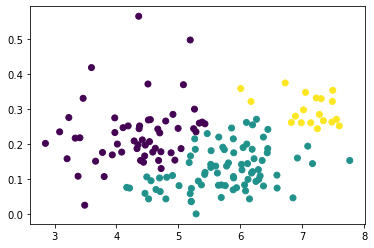

In [11]:
plt.scatter(var1,var2,data=happy,c="agglo_cluster_scaled")

#### 3 - Comparison

Clearly, the results of the two cluster procedures are very similar. However, there are some minor differences. The clusters differ particularly at the edges. For instance, the lower cluster (green in the second plot) is larger for the agglomerative clustering than for the K-means clustering.

### 3. Clustering without standardization

Standardization is important to ensure that all variables have equl influence on the clustering.

1. Repeat the K-means clustering analysis with the same number of clusters,but this time with the original non-standardized data.
2. As before, plot the cluster solution and color the countries accordingly.
3. Clearly, the plotted cluster solutions differ. How do you recognize the lack of standardization in the plot?

#### 1 - Clustering without standardization

In [20]:
# K-means clustering with unstandardized data
kmeans_nst = KMeans(n_clusters=3,init="random",n_init=10,random_state=42)
kmeans_nst.fit(happy_cluster)
kmeans_label = kmeans_nst.labels_
happy["kmeans_cluster_nst"] = kmeans_label
kmeans_nst.inertia_
happy_cluster.head()

,score,generosity
0,7.769,0.153
1,7.600,0.252
2,7.554,0.271
3,7.494,0.354
4,7.488,0.322


#### 2 - Plotting the cluster solution

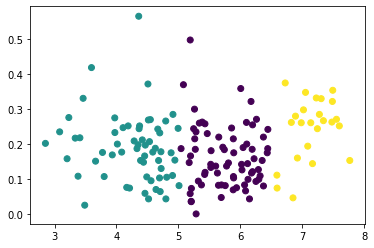

In [18]:
plt.scatter(var1,var2,data=happy,c="kmeans_cluster_nst")

In [14]:
happy[[var1,var2]].describe()

,score,generosity
count,156.000000,156.000000
mean,5.407096,0.184846
std,1.113120,0.095254
min,2.853000,0.000000
25%,4.544500,0.108750
50%,5.379500,0.177500
75%,6.184500,0.248250
max,7.769000,0.566000


#### 3 - The problem with non-standardized data

The plot clearly shows that the clustering with non-standardized data resulted in a stratification of the countries by the happiness score. The happiness sccore has a much larger range than the generosity variable (2.85-7.77 versus 0-0.57). Therefore, it also has a much larger influence on the clustering procedure. The generosity variable didn't seem to influence the cluster formation at all.